In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

from twamm import *
from whale_order import WhaleOrder

# Large buy order, no arb

In [4]:
# Let's start with a 1:1 price with a lot of size on the AMM
twamm = TWAMM(1e4, 1e4)

# We'll add a large buy order
num_steps = 1000
x_order = WhaleOrder(1e4, num_steps)
twamm.add_x_order(x_order)

# What happens to price as we execute this fully?
step = []
prices = []
filled = []
for i in range(num_steps):
    twamm.trade_batch()
    step.append(i)
    prices.append(twamm.last_y_price)
    filled.append(twamm.x_orders[0].qty_filled)

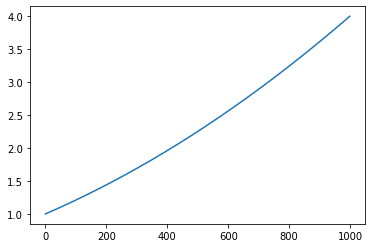

In [5]:
sbn.lineplot(step, prices)

# Large buy order with arber keeping prices in line

In [6]:
from arbitrageur import Arbitrageur
# Let's start with a 1:1 price with a lot of size on the AMM
true_y_price = 1
twamm = TWAMM(1e4, 1e4)

# Add someone who will do arbs when price is large enough
arber = Arbitrageur(twamm.amm)

# We'll add a large buy order
num_steps = 1000
x_order = WhaleOrder(1e4, num_steps)
twamm.add_x_order(x_order)

# What happens to price as we execute this fully?
step = []
prices = []
filled = []
arber_profit = []
for i in range(num_steps):
    twamm.trade_batch()
    step.append(i)
    prices.append(twamm.last_y_price)
    filled.append(twamm.x_orders[0].qty_filled)
    
    # Add someone who will arb when price is > 1% above where it should be
    if twamm.last_y_price > 1.05 * true_y_price:
        arber.do_arb(true_y_price)
    arber_profit.append(arber.get_x_profit(true_y_price))

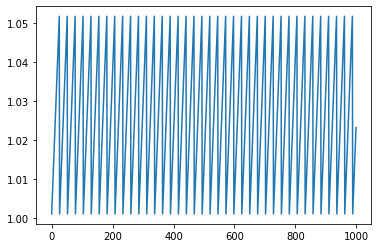

In [7]:
sbn.lineplot(step, prices)

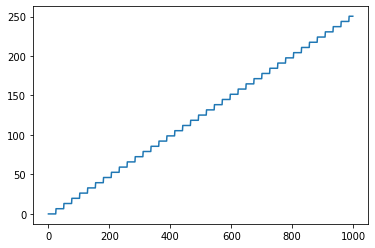

In [8]:
sbn.lineplot(step, arber_profit)

# Large buy order with arber keeping prices in line, as well as offsetting sell order for part of the time

In [11]:
from arbitrageur import Arbitrageur
# Let's start with a 1:1 price with a lot of size on the AMM
true_y_price = 1
twamm = TWAMM(1e4, 1e4)

# Add someone who will do arbs when price is large enough
arber = Arbitrageur(twamm.amm)

# We'll add a large buy order
num_steps = 1000
x_order = WhaleOrder(1e4, num_steps)
twamm.add_x_order(x_order)

# Add offsetting sell order for first half
y_order = WhaleOrder(5e3, num_steps/2)
twamm.add_y_order(y_order)

# What happens to price as we execute this fully?
step = []
prices = []
filled = []
arber_profit = []
for i in range(num_steps):
    twamm.trade_batch()
    step.append(i)
    prices.append(twamm.last_y_price)
    filled.append(twamm.x_orders[0].qty_filled)
    
    # Add someone who will arb when price is > 1% above where it should be
    if twamm.last_y_price > 1.05 * true_y_price:
        arber.do_arb(true_y_price)
    arber_profit.append(arber.get_x_profit(true_y_price))

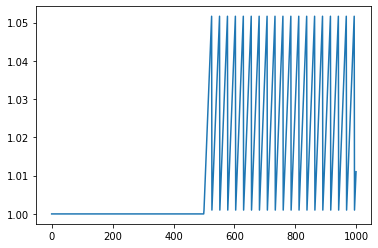

In [12]:
sbn.lineplot(step, prices)

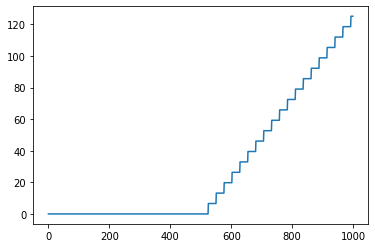

In [13]:
sbn.lineplot(step, arber_profit)